# TO DO

0) Determine which "easy data" to add (conferences, neutral site option, spread?, rank, etc)
1) How to include specific match data
2) Try RandomForests and other models
3) Add more evaluations
4) Predict over/under instead/also?
5) Research how to make dimensionality reduction work and still be able to get a prediction
6) Move desired current prediction to the top of the sheet

Current Parameters:

In [1]:
# Number of Neurons
neurons_1 = 27  
neurons_2 = 5  
neurons_3 = 3
neurons_4 = 7

# Activation Types
activation_1 = "tanh" # Original: "relu"
activation_2 = "sigmoid"
activation_3 = "sigmoid"
activation_4 = "sigmoid"
activation_outer = "sigmoid"

#Number of Epochs
num_epochs = 20 # Original: 50

# Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing
import pandas as pd
import tensorflow as tf
import keras

#  Import and read the charity_data.csv.
import pandas as pd 
# application_df = pd.read_csv("Resources/charity_data.csv")
# application_df.head()

### Extracting CSVs

In [3]:
parse_dates = ["GAME DATE"]
nba_df = pd.DataFrame(pd.read_csv("Data/Sample_NBA_Data_Reg_Season_2022.csv", parse_dates=parse_dates))

nba_teams_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_adv_stats.csv"))
nba_def_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_def.csv"))
nba_off_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_off.csv"))
nba_post_adv_stats_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_adv_stats.csv"))
nba_post_def_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_def.csv"))
nba_post_off_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_off.csv"))

reg_season_compiled = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_reg_compiled_stats.csv").drop(['Unnamed: 0'],axis=1))
post_season_compiled = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_compiled_stats.csv").drop(['Unnamed: 0'],axis=1))

In [4]:
reg_season_compiled
nba_df.head(50)

TEAM     MATCH UP  GAME DATE W/L  MIN  PTS  FGM  FGA   FG%  3PM  ...  \
0   MIN  MIN vs. CHI 2022-04-10   L  240  120   46   91  50.5   11  ...   
1   CHI    CHI @ MIN 2022-04-10   W  240  124   44   83  53.0   10  ...   
2   PHI  PHI vs. DET 2022-04-10   W  240  118   46   88  52.3    5  ...   
3   DET    DET @ PHI 2022-04-10   L  240  106   38   83  45.8   11  ...   
4   MEM  MEM vs. BOS 2022-04-10   L  240  110   39  102  38.2   15  ...   
5   BOS    BOS @ MEM 2022-04-10   W  240  139   54   99  54.5   18  ...   
6   LAL    LAL @ DEN 2022-04-10   W  265  146   44   94  46.8   16  ...   
7   DEN  DEN vs. LAL 2022-04-10   L  265  141   49  100  49.0   15  ...   
8   ORL  ORL vs. MIA 2022-04-10   W  240  125   45   91  49.5   23  ...   
9   MIA    MIA @ ORL 2022-04-10   L  240  111   40   94  42.6   19  ...   
10  NYK  NYK vs. TOR 2022-04-10   W  240  105   40   87  46.0   15  ...   
11  TOR    TOR @ NYK 2022-04-10   L  240   94   36   92  39.1   12  ...   
12  BKN  BKN vs. IND 2022-04-10   W  240  134   52   81  64.2    8  ...   
13  IND    IND @ BKN 2022-04-10   L  240  126   47  104  45.2   19  ...   
14  HOU  HOU vs. ATL 2022-04-10   L  240  114   41   89  46.1   17  ...   
15  ATL    ATL @ HOU 2022-04-10   W  240  130   45   87  51.7   21  ...   
16  WAS    WAS @ CHA 2022-04-10   L  240  108   42   94  44.7    8  ...   
17  CHA  CHA vs. WAS 2022-04-10   W  240  124   48   89  53.9   18  ...   
18  CLE  CLE vs. MIL 2022-04-10   W  240  133   51   94  54.3   19  ...   
19  MIL    MIL @ CLE 2022-04-10   L  240  115   39   88  44.3   12  ...   
20  PHX  PHX vs. SAC 2022-04-10   L  240  109   42  103  40.8   14  ...   
21  SAC    SAC @ PHX 2022-04-10   W  240  116   40   76  52.6   14  ...   
22  POR  POR vs. UTA 2022-04-10   L  240   80   31   83  37.3    9  ...   
23  UTA    UTA @ POR 2022-04-10   W  240  111   37   82  45.1    9  ...   
24  NOP  NOP vs. GSW 2022-04-10   L  240  107   42   99  42.4   14  ...   
25  GSW    GSW @ NOP 2022-04-10   W  240  128   49   81  60.5   19  ...   
26  SAS    SAS @ DAL 2022-04-10   L  240  120   43   89  48.3   11  ...   
27  DAL  DAL vs. SAS 2022-04-10   W  240  130   46   85  54.1   20  ...   
28  LAC  LAC vs. OKC 2022-04-10   W  240  138   54   97  55.7   18  ...   
29  OKC    OKC @ LAC 2022-04-10   L  240   88   37   98  37.8    9  ...   
30  SAC    SAC @ LAC 2022-04-09   L  240   98   38   86  44.2    7  ...   
31  LAC  LAC vs. SAC 2022-04-09   W  240  117   42   86  48.8   21  ...   
32  SAS  SAS vs. GSW 2022-04-09   L  240   94   32   80  40.0   10  ...   
33  GSW    GSW @ SAS 2022-04-09   W  240  100   33   81  40.7    8  ...   
34  NOP    NOP @ MEM 2022-04-09   L  240  114   41   91  45.1    6  ...   
35  MEM  MEM vs. NOP 2022-04-09   W  240  141   53   90  58.9   18  ...   
36  IND    IND @ PHI 2022-04-09   L  240  120   41   78  52.6   10  ...   
37  PHI  PHI vs. IND 2022-04-09   W  240  133   50   90  55.6   12  ...   
38  OKC    OKC @ LAL 2022-04-08   L  240  101   40   88  45.5    6  ...   
39  LAL  LAL vs. OKC 2022-04-08   W  240  120   41   82  50.0    9  ...   
40  PHX    PHX @ UTA 2022-04-08   W  240  111   46   92  50.0    6  ...   
41  UTA  UTA vs. PHX 2022-04-08   L  240  105   35   88  39.8   11  ...   
42  DAL  DAL vs. POR 2022-04-08   W  240  128   42   79  53.2   20  ...   
43  POR    POR @ DAL 2022-04-08   L  240   78   31   83  37.3    7  ...   
44  ATL    ATL @ MIA 2022-04-08   L  240  109   42   88  47.7    8  ...   
45  MIA  MIA vs. ATL 2022-04-08   W  240  113   40   72  55.6   11  ...   
46  CHI  CHI vs. CHA 2022-04-08   L  240  117   44   82  53.7   13  ...   
47  CHA    CHA @ CHI 2022-04-08   W  240  133   52   86  60.5   19  ...   
48  BKN  BKN vs. CLE 2022-04-08   W  240  118   43   92  46.7   12  ...   
49  CLE    CLE @ BKN 2022-04-08   L  240  107   40   82  48.8    8  ...   

      FT%  OREB  DREB  REB  AST  STL  BLK  TOV  PF  +/-  
0    77.3     9    23   32   30    7    9   13  23   -4  
1    78.8    16    32   48   22    9    3   23  22    4  
2  

### Creating Team Name - Abbreviation Dataframe

In [5]:
team_names_series = reg_season_compiled["Team"]

team_abbv = ["MIN", "MEM", "MIL", "CHA", "PHX", "ATL", "UTA", "SAS", "BKN", "DEN", "LAL", "BOS", "CHI", "IND", "GSW", "SAC", "MIA", "PHI", "HOU", "TOR", "NOP", "WAS", "LAC", "DAL", "CLE", "NYK", "POR", "DET", "ORL", "OKC"]
team_abbv_series = pd.Series(team_abbv)

frame = { 'Team': team_names_series, 'ABBV': team_abbv_series }

name_abbv = pd.DataFrame(frame)

name_abbv

Team ABBV
0   Minnesota Timberwolves  MIN
1        Memphis Grizzlies  MEM
2          Milwaukee Bucks  MIL
3        Charlotte Hornets  CHA
4             Phoenix Suns  PHX
5            Atlanta Hawks  ATL
6                Utah Jazz  UTA
7        San Antonio Spurs  SAS
8            Brooklyn Nets  BKN
9           Denver Nuggets  DEN
10      Los Angeles Lakers  LAL
11          Boston Celtics  BOS
12           Chicago Bulls  CHI
13          Indiana Pacers  IND
14   Golden State Warriors  GSW
15        Sacramento Kings  SAC
16              Miami Heat  MIA
17      Philadelphia 76ers  PHI
18         Houston Rockets  HOU
19         Toronto Raptors  TOR
20    New Orleans Pelicans  NOP
21      Washington Wizards  WAS
22    Los Angeles Clippers  LAC
23        Dallas Mavericks  DAL
24     Cleveland Cavaliers  CLE
25         New York Knicks  NYK
26  Portland Trail Blazers  POR
27         Detroit Pistons  DET
28           Orlando Magic  ORL
29   Oklahoma City Thunder  OKC

### Combine DataFrames

In [6]:
# Merge Agg Data with Abbv to create a dataframe with the aggregate data and the team abbreviation

reg_season_abbv = reg_season_compiled.merge(name_abbv, how = "left", on = "Team")

In [7]:
# Run this cell to check dtypes

# for i in range(0, len(reg_season_abbv.columns)):
#     print(f"{reg_season_abbv.columns[i]}: {reg_season_abbv.dtypes[i]}")

Matches is dropping all of the specific game data because I do not currently know how to utilize it

In [8]:
# Create "matches" for the usuable match up data
matches = nba_df[["TEAM", "MATCH UP", "W/L"]].copy()

# Split the "MATCH UP" Column into 3 separate columns
matches[["TEAM", "TYPE", "OPPONENT"]] = matches['MATCH UP'].apply(lambda x: pd.Series(x.split(' ')))

# Drop the original "MATCH UP" column
matches = matches.drop(["MATCH UP"], axis = 1)

In [9]:
# Distinguish Opponent Data from "Defending" Team Data   - Is "defending" the right term?
oppo_reg_season_abbv = reg_season_abbv.add_prefix('OPPO_')

In [10]:
# Merge Team Agg Info with Match Info, twice... Once for defending team, once for opponent
team_games_data = matches.merge(reg_season_abbv, how = "left", left_on = "TEAM", right_on = "ABBV").merge(oppo_reg_season_abbv, how = "left", left_on = "TEAM", right_on = "OPPO_ABBV")

# Drop target and superfluous columns
team_games_data = team_games_data.drop(['W/L', "Team", "OPPO_Team", "ABBV", "OPPO_ABBV"], axis = 1)

# Dummies, Scaling, Splitting Data

I wasn't able to filter y out the same way as the homework, but this seems to work.  Note: I tried the hw method before dropping W/L above this line

In [11]:
# Designate the target values as the winning side of W/L
y = pd.get_dummies(matches['W/L'])
y = y["W"]

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
team_games_data_dummies = pd.get_dummies(team_games_data)
team_games_data_dummies.shape

(250, 196)

In [13]:
# Run this cell to check dtypes

# for i in range(0, len(team_games_data_dummies.columns) - 1):
#     print(f"{team_games_data_dummies.columns[i]}: {team_games_data_dummies.dtypes[i]}")

In [14]:
# Split our preprocessed data into our features and target arrays
X = team_games_data_dummies
# y = team_games_dummies['W/L']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = neurons_1, activation = activation_1, input_dim = num_features))

# Second hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_2, activation = activation_2))

# Third hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_3, activation = activation_3))

# Third hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_4, activation = activation_4))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = activation_outer))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 27)                5319      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 140       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 28        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 5,513
Trainable params: 5,513
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=num_epochs)

Epoch 1/20
6/6 [==============================] - 0s 665us/step - loss: 0.6952 - accuracy: 0.5080
Epoch 2/20
6/6 [==============================] - 0s 665us/step - loss: 0.6938 - accuracy: 0.5080
Epoch 3/20
6/6 [==============================] - 0s 499us/step - loss: 0.6926 - accuracy: 0.5080
Epoch 4/20
6/6 [==============================] - 0s 332us/step - loss: 0.6922 - accuracy: 0.5080
Epoch 5/20
6/6 [==============================] - 0s 499us/step - loss: 0.6912 - accuracy: 0.5080
Epoch 6/20
6/6 [==============================] - 0s 499us/step - loss: 0.6907 - accuracy: 0.5080
Epoch 7/20
6/6 [==============================] - 0s 499us/step - loss: 0.6910 - accuracy: 0.5080
Epoch 8/20
6/6 [==============================] - 0s 499us/step - loss: 0.6899 - accuracy: 0.5080
Epoch 9/20
6/6 [==============================] - 0s 498us/step - loss: 0.6895 - accuracy: 0.5080
Epoch 10/20
6/6 [==============================] - 0s 499us/step - loss: 0.6892 - accuracy: 0.5080
Epoch 11/20
6/6 [==

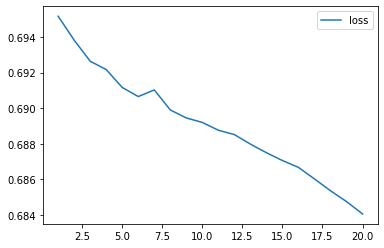

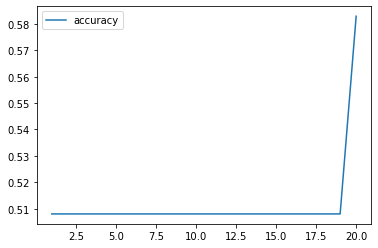

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
history_df.plot(y="accuracy");

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.6906317472457886, Accuracy: 0.5555555820465088


In [39]:
# Save and export your results to an HDF5 file
nn.save("Models/NBA_model_basic.h5")

# GAME PREDICTION

In [44]:
# Boston Celtics BOS @ Golden State Warriors GSW

# Test predictions on PHX vs. HOU

team_A = "BOS" #TEAM
game_type = "@" #TYPE
team_B = "GSW" #OPPONENT

d = {"TEAM": team_A, "TYPE": game_type, "OPPONENT": team_B}

current_match = pd.DataFrame(data = d, index=[0])
current_match

TEAM TYPE OPPONENT
0  BOS    @      GSW

### Create dataframe that matches the columns from "X_train"

In [45]:
# Merge aggregate info into the match data frame
current_game_data = current_match.merge(reg_season_abbv, how = "left", left_on = "TEAM", right_on = "ABBV").merge(oppo_reg_season_abbv, how = "left", left_on = "TEAM", right_on = "OPPO_ABBV")
current_game_data = pd.get_dummies(current_game_data.drop(["Team", "OPPO_Team", "ABBV", "OPPO_ABBV"], axis = 1))

# Add missing columns and assign a value of "0" for each
fill_list = list(set(team_games_data_dummies.columns) - set(current_game_data.columns))

for i in fill_list:
    current_game_data[i] = 0

# Make the column orders match
columns = list(X_train.columns)
current_game_data = current_game_data[columns].copy()

In [46]:
# Confirm a lack of differences
print(list(set(current_game_data.columns) - set(X_train.columns)))
print(list(set(X_train.columns) - set(current_game_data.columns)))

# Confirm columns are in the same order
for i in range(0, len(X_train.columns) - 1):
    if current_game_data.columns[i] != X_train.columns[i]:
        print(f"column {i} does not match")

[]
[]


In [47]:
# Use dataframe of current match data to generate prediction - https://machinelearningmastery.com/make-predictions-scikit-learn/

X_new = X_scaler.transform(current_game_data)
y_new = nn.predict([X_new])

In [48]:
y_new[0]

array([0.5180747], dtype=float32)

# Automated Optimization

In [49]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=2), activation=activation, input_dim=num_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [50]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [51]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs = 20, validation_data=(X_test_scaled,y_test))

INFO:tensorflow:Oracle triggered exit


In [52]:
X_train_scaled.shape, X_test_scaled.shape

((187, 196), (63, 196))

In [53]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters()[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 15,
 'num_layers': 1,
 'units_0': 27,
 'units_1': 15,
 'units_2': 17,
 'units_3': 21,
 'units_4': 3,
 'units_5': 29,
 'tuner/epochs': 6,
 'tuner/initial_epoch': 2,
 'tuner/bracket': 3,
 'tuner/round': 1,
 'tuner/trial_id': '0033'}

In [54]:
def get_best_model(nn, parameters, X_train_scaled, y_train):
    clf = GridSearchCV(model, parameters, cv=4, n_jobs=-1)
    clf.fit(X_train, y_train)
    # print(clf.best_params_)
    return clf.best_estimator_ 

In [55]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [56]:
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# param_grid = dict(activation=activation)


# param_grid = dict(epochs=[10, 20, 30])
# grid = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

In [57]:
# best_model = tuner.get_best_models()[0]
# best_model

## The following cell will start to break if you run it too many times before restarting the kernal

In [58]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.6344 - accuracy: 0.6984
Loss: 0.6344217658042908, Accuracy: 0.6984127163887024


In [61]:
# Save and export results to an HDF5 file
accu = round(model_accuracy * 10_000)
best_model.save(f"Models/NBA_model_auto{accu}.h5")

## New Prediction

In [62]:
y_best_model = best_model.predict([X_new])
y_best_model

array([[0.68921953]], dtype=float32)

# OLD HOMEWORK STARTS HERE

In [ ]:
# Create a callback that saves the model's weights every 5 epochs.
saves = 5
mc = keras.callbacks.ModelCheckpoint('Optimized_Weights/weights{epoch:08d}.h5', save_weights_only=True, save_freq=saves, verbose = 0)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=num_epochs, callbacks=[mc])

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
loan_model = load_model("AlphabetSoupCharity_Optimization.h5")